In [103]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
import matplotlib.pyplot as plt
import numpy as np


from collections import defaultdict

In [279]:
df = pd.read_csv('mistborn-eyebrow.txt', sep='\t')
df.head(20)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-279-561c2feda899>", line 1, in <module>
    df = pd.read_csv('mistborn-eyebrow.txt', sep='\t')
  File "/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/pandas/io/parsers.py", line 697, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/pandas/io/parsers.py", line 424, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/pandas/io/parsers.py", line 890, in __init__
    self._make_engine(self.engine)
  File "/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/pandas/io/parsers.py", line 1117, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Ap

FileNotFoundError: [Errno 2] File b'mistborn-eyebrow.txt' does not exist: b'mistborn-eyebrow.txt'

In [7]:
dfg = df.groupby("book")

In [15]:
# final empire
fe = dfg.get_group(1)
print("Final Empire count:", fe.shape[0])

# well of ascension
wa = dfg.get_group(2)
print("Well of Ascension count:", wa.shape[0])

# hero of ages 
ha = dfg.get_group(3)
print("Hero of ages count:", ha.shape[0])

Final Empire count: 53
Well of Ascension count: 48
Hero of ages count: 43


## Which characters raise their eyebrows the most?

In [22]:
fe.groupby('character').size().reset_index(name="counts")

,character,counts
0,breeze,6
1,dockson,3
2,elend,3
3,ham,5
4,jastes,1
5,kelsier,19
6,laird,2
7,marsh,1
8,obligator,1
9,sazed,3


In [107]:
fe_raisers = defaultdict(int,fe.character.value_counts())
print(fe_raisers)

fe_raisees = defaultdict(int,fe.target.value_counts())
print(fe_raisees)

all_chars = set(list(fe_raisers.keys()) + list(fe_raisees.keys()))
all_chars

# build raiser/raisee count df
data = [(x, fe_raisers[x], fe_raisees[x]) for x in all_chars]
raise_df = pd.DataFrame(data, columns=['character','raiser','raisee']).sort_values("raiser",ascending=False)

defaultdict(<class 'int'>, {'kelsier': 19, 'vin': 8, 'breeze': 6, 'ham': 5, 'dockson': 3, 'elend': 3, 'sazed': 3, 'laird': 2, 'jastes': 1, 'marsh': 1, 'obligator': 1, 'shan': 1})
defaultdict(<class 'int'>, {'vin': 22, 'elend': 6, 'kelsier': 6, 'sazed': 4, 'ham': 4, 'breeze': 2, 'camon': 2, 'soldier': 1, 'tresting': 1, 'bevidon': 1, 'yeden': 1, 'tepper': 1, 'hoyd': 1, 'spook': 1})


In [100]:
x_order = list(fe_raisers)


In [96]:
data_melt = raise_df.melt(id_vars='character',
                          value_vars=['raiser','raisee'],
                          var_name="eyebrow",
                          value_name="count").sort_values('count',ascending=False)
data_melt

,character,eyebrow,count
35,vin,raisee,22
0,kelsier,raiser,19
15,vin,raiser,8
38,elend,raisee,6
19,breeze,raiser,6
20,kelsier,raisee,6
3,ham,raiser,5
23,ham,raisee,4
24,sazed,raisee,4
7,dockson,raiser,3


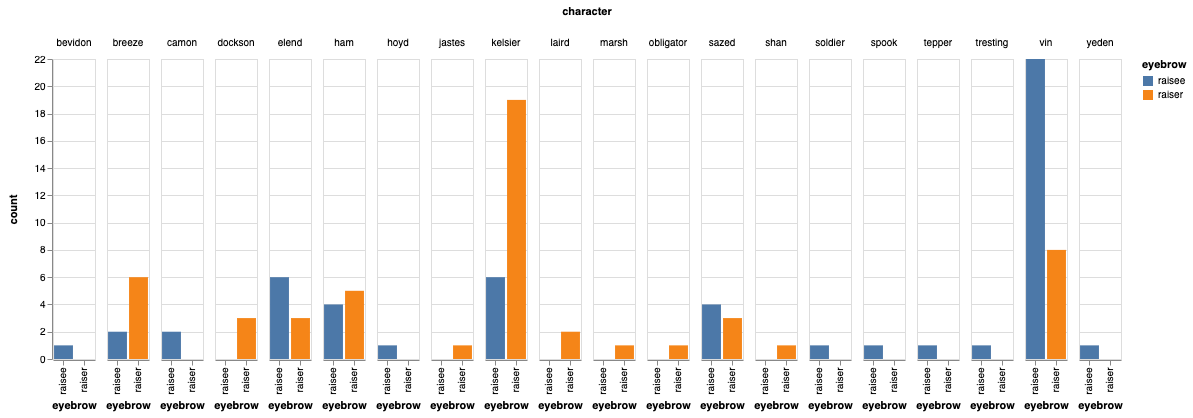

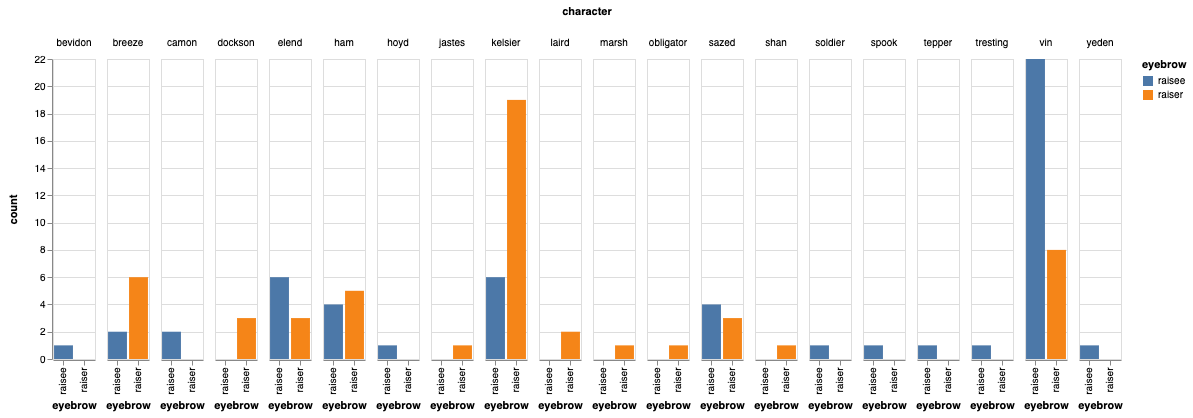

In [102]:
alt.Chart(data_melt).mark_bar().encode(
    x=alt.X('eyebrow:N'),
    y='count:Q',
    column='character:N',
    color='eyebrow:N'
)

In [108]:
raise_df

,character,raiser,raisee
0,kelsier,19,6
15,vin,8,22
19,breeze,6,2
3,ham,5,4
7,dockson,3,0
18,elend,3,6
4,sazed,3,4
5,laird,2,0
14,jastes,1,0
6,shan,1,0


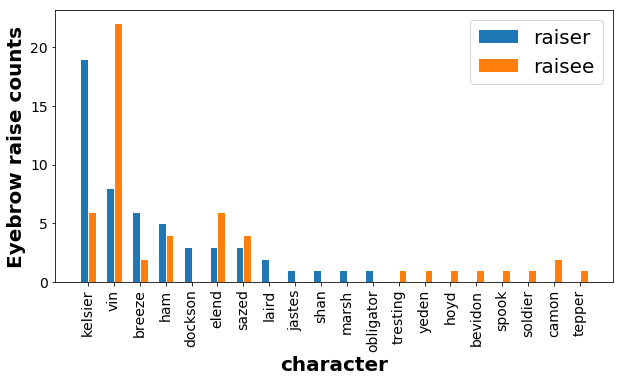

In [143]:
fig = plt.figure(figsize=(10,5))
# set width of bar
barWidth = .3

# set height of bar
bars1 = raise_df.raiser.values
bars2 = raise_df.raisee.values
# bars3 = raise_df.raiser.values
# bars4 = raise_df.raisee.values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='raiser')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='raisee')
# plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='raiser')
# plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='raisee')

# Add xticks on the middle of the group bars
plt.xlabel('character', fontweight='bold',size=20)
plt.xticks([r +barWidth/2 for r in range(len(bars1))], raise_df.character.values,rotation=90,size=14)

plt.ylabel("Eyebrow raise counts",fontweight='bold',size=20)
plt.yticks(size=14)
# Create legend & Show graphic
plt.legend(fontsize=20)
plt.show()


## Chunk the eyebrow raises

In [149]:
chunk_size = 20
max_page = df.page.max()

chunks = np.arange(0,max_page,chunk_size)
chunks

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500,
       520, 540, 560, 580, 600, 620, 640, 660, 680, 700])

In [159]:
test = fe.groupby("character")
kell = test.get_group("kelsier")

In [176]:
def get_raises_over_time(df, characters,chunk_size):
    '''
    For a given character, aggregate the number eyebrow raises within
    a given chunk size over the course of the book
    '''
    rows = []
    max_page = df.page.max()
    
    # group the df by character
    dfg = df.groupby("character")
    
    for ch in characters:
        if ch not in dfg.groups:
            continue
        char_rows = [] # rows for this character
        df_ch = dfg.get_group(ch)

        # start at chunk_size, go thru max page, skip by chunk_size intervals
        for i in np.arange(chunk_size,max_page,chunk_size):
            num_raises = df_ch[df_ch['page'].between(i-chunk_size,i)].shape[0]
            char_rows.append([ch, i,num_raises])
            
        # collec theses rows into the the full dataset
        rows += char_rows
        
    return pd.DataFrame(rows, columns=["character", "page_interval", "eyebrow_raises"])
        

In [180]:
time_df = get_raises_over_time(fe, all_chars, 50)

In [181]:
time_df.head()

,character,page_interval,eyebrow_raises
0,kelsier,50,1
1,kelsier,100,5
2,kelsier,150,2
3,kelsier,200,4
4,kelsier,250,3


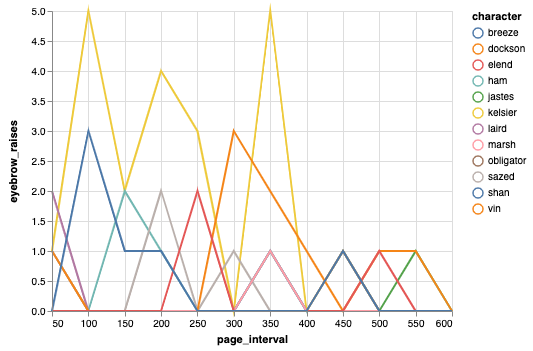

In [182]:
alt.Chart(time_df).mark_line().encode(
    x='page_interval:Q',
    y='eyebrow_raises:Q',
    color='character:N'
)

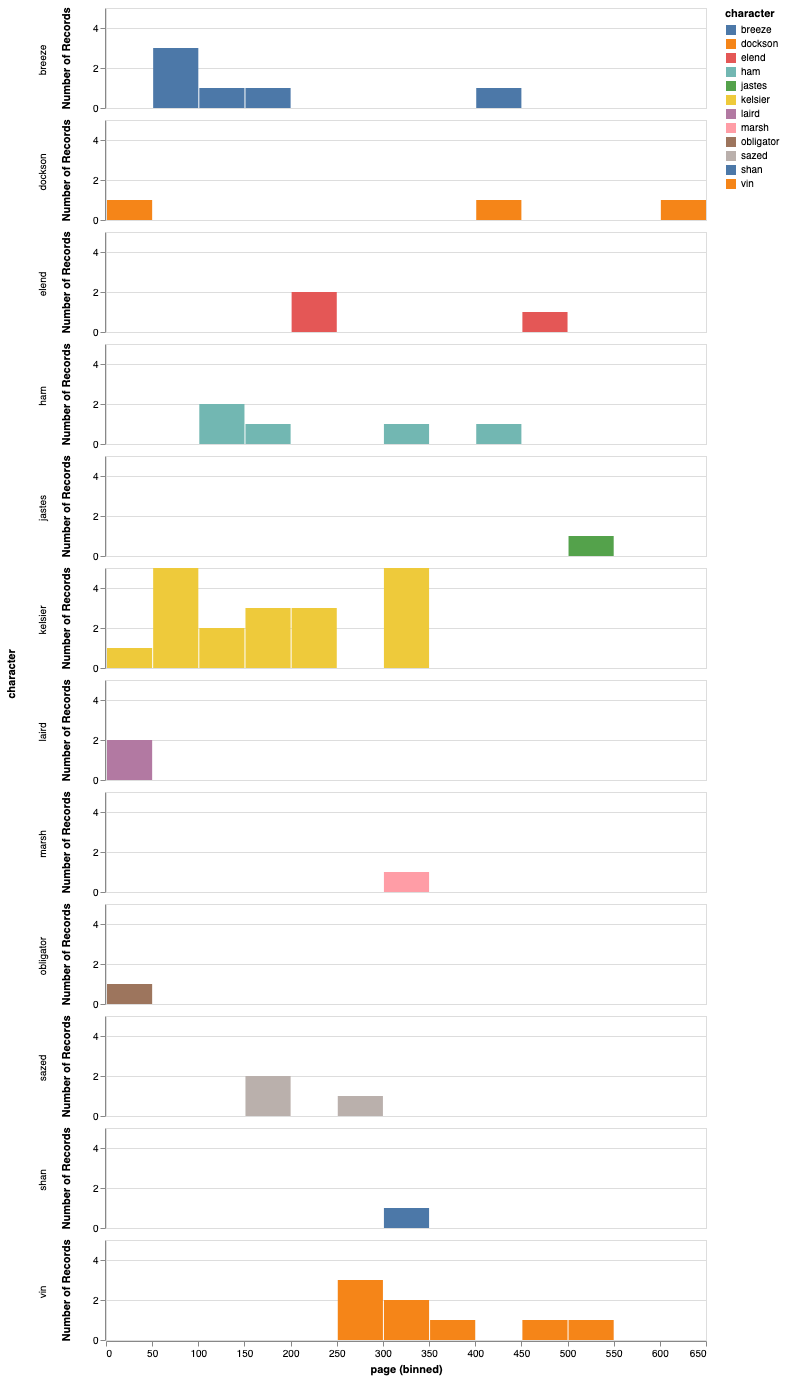

In [193]:
alt.Chart(fe,
          width=600,
          height=100
         ).mark_bar().encode(
    alt.X("page:Q", bin=alt.Bin(maxbins=20)),
    y='count()',
    row='character:N',
    color="character:N"
)

In [226]:
MAIN_CHARS = ['kelsier','vin','elend','breeze','ham','sazed']
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(MAIN_CHARS,range(len(MAIN_CHARS))))
df['char_order'] = df['character'].map(sorterIndex)

fe_filt = fe[fe['character'].isin(MAIN_CHARS)]
fe_filt['char_order'] = fe_filt['character'].map(sorterIndex)
fe_filt.sort_values('char_order',inplace=True)
fe_filt

/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,page,character,target,book,char_order
1,8,kelsier,tepper,1,0
43,348,kelsier,ham,1,0
40,329,kelsier,vin,1,0
39,323,kelsier,vin,1,0
38,323,kelsier,vin,1,0
37,313,kelsier,hoyd,1,0
29,239,kelsier,vin,1,0
26,202,kelsier,vin,1,0
24,198,kelsier,sazed,1,0
19,158,kelsier,vin,1,0


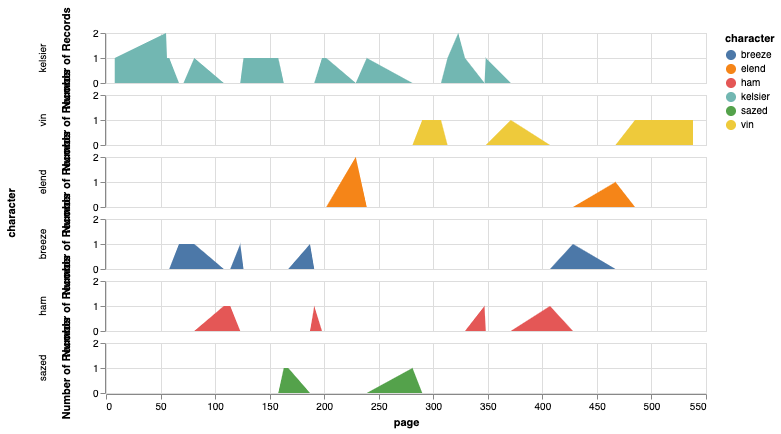

In [254]:
alt.Chart(fe_filt).mark_area().encode(
    x='page:Q',
    y='count()',
    color='character:N'
).properties(
    height=50, 
    width=600
).facet(
    row = alt.Row('character:N', sort=['vin','elend','breeze'])
)
# This refuses to custom sort even though the vega example sorts fine >.<

## Other viz
* Try as strip plot
* Try as heat map

In [266]:
fe_indiv = fe.rename(
    columns={'character':'raiser','target':'raisee'}
    ).melt(id_vars='page',
                   value_vars=['raiser','raisee'],
                   var_name = "eyebrow",       
                   value_name="character")
fe_indiv.head(10)

,page,eyebrow,character
0,2,raiser,obligator
1,8,raiser,kelsier
2,25,raiser,laird
3,26,raiser,laird
4,30,raiser,dockson
5,55,raiser,kelsier
6,55,raiser,kelsier
7,56,raiser,kelsier
8,58,raiser,kelsier
9,67,raiser,breeze


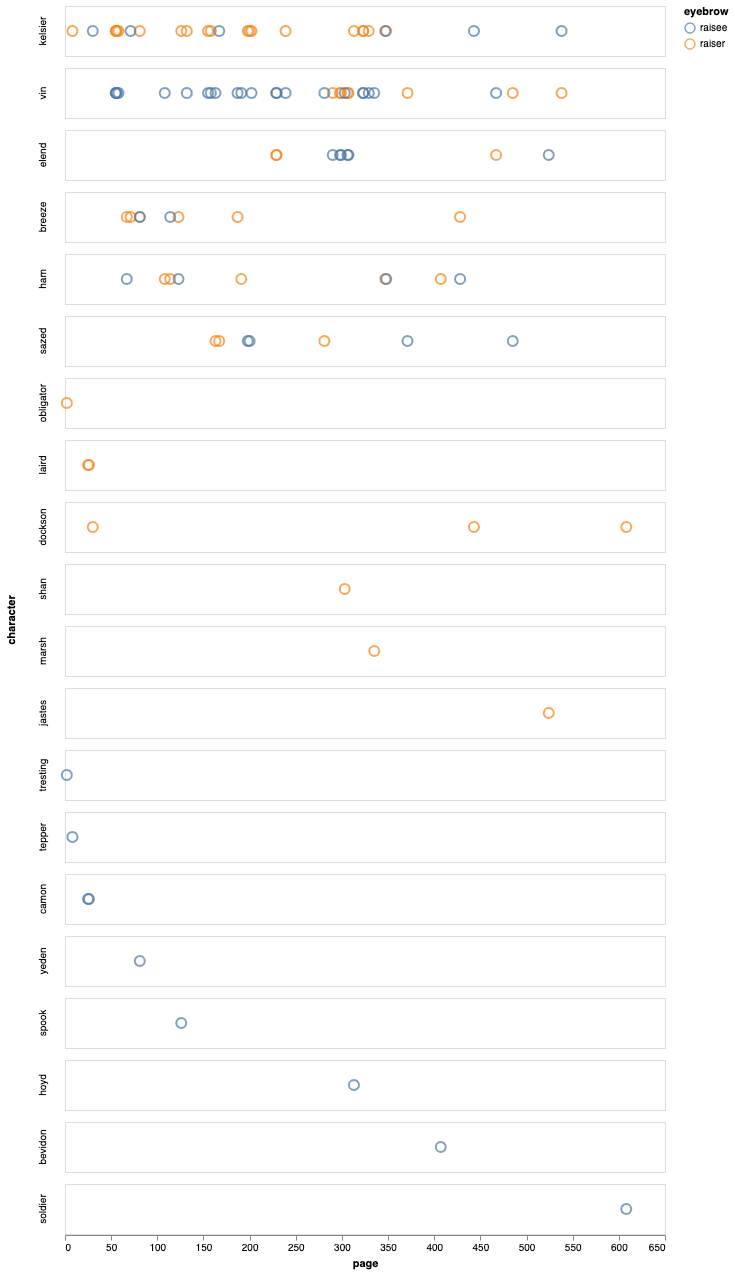

In [267]:
# Individual characters transitions between eyebrow raisers to raisees
alt.Chart(fe_indiv).mark_point(size=100).encode(
    x='page:Q',
    color=alt.Color('eyebrow:N'),
    row = alt.Row('character:N', sort=MAIN_CHARS),
).properties(
    height=50, 
    width=600
)

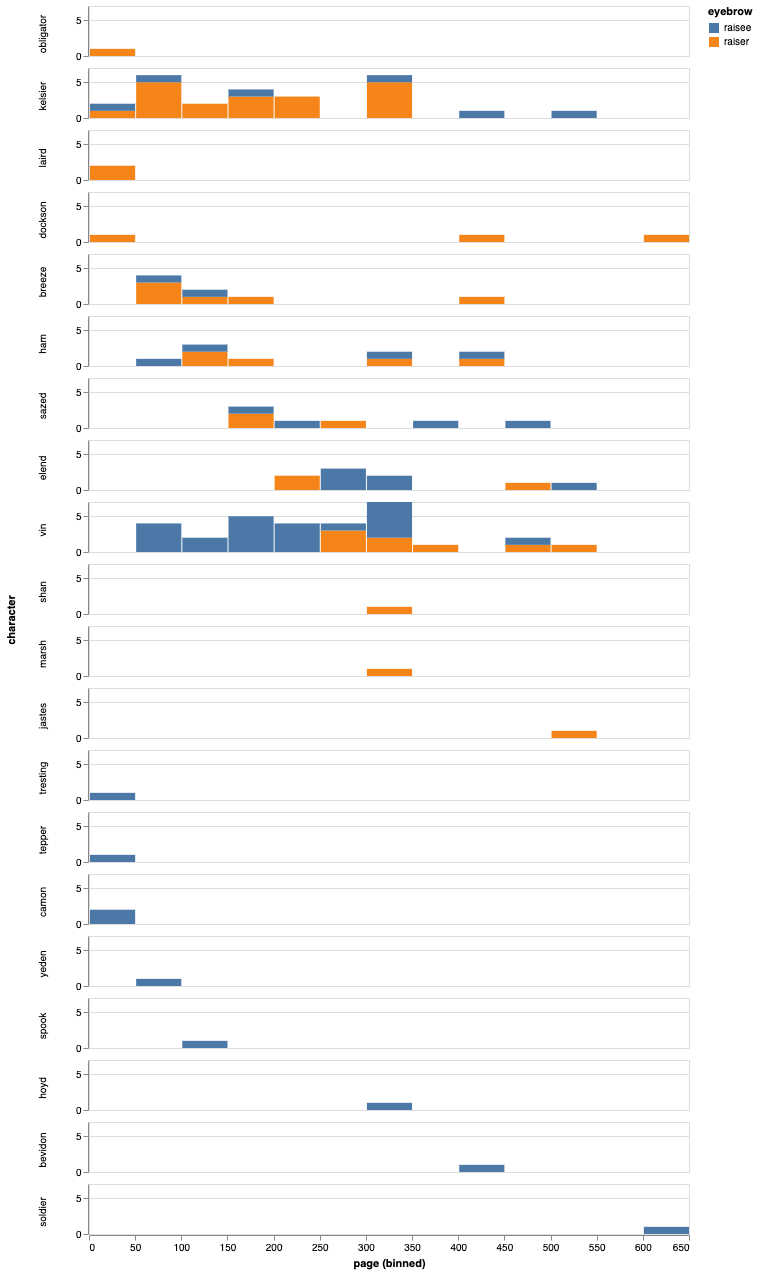

In [278]:
# Individual characters transitions between eyebrow raisers to raisees
alt.Chart(fe_indiv
).mark_bar().encode(
    x=alt.X('page:Q',bin=alt.Bin(maxbins=20)),
    y=alt.Y('count()',axis=alt.Axis(title='')),
    color=alt.Color('eyebrow:N'),
    row = alt.Row('character:N', sort=MAIN_CHARS),
).properties(
    height=50, 
    width=600
)


# need to update altair for this to work...

# # Individual characters transitions between eyebrow raisers to raisees
# alt.Chart(fe_indiv).transform_fold(
#     ['raiser','raisee'],
#     as_=['eyebrow:N','page:Q']
# ).mark_bar().encode(
#     x=alt.X('page:Q',bin=alt.Bin(maxbins=20)),
#     y='count()',
#     color=alt.Color('eyebrow:N'),
#     row = alt.Row('character:N', sort=MAIN_CHARS),
# ).properties(
#     height=50, 
#     width=600
# )


/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


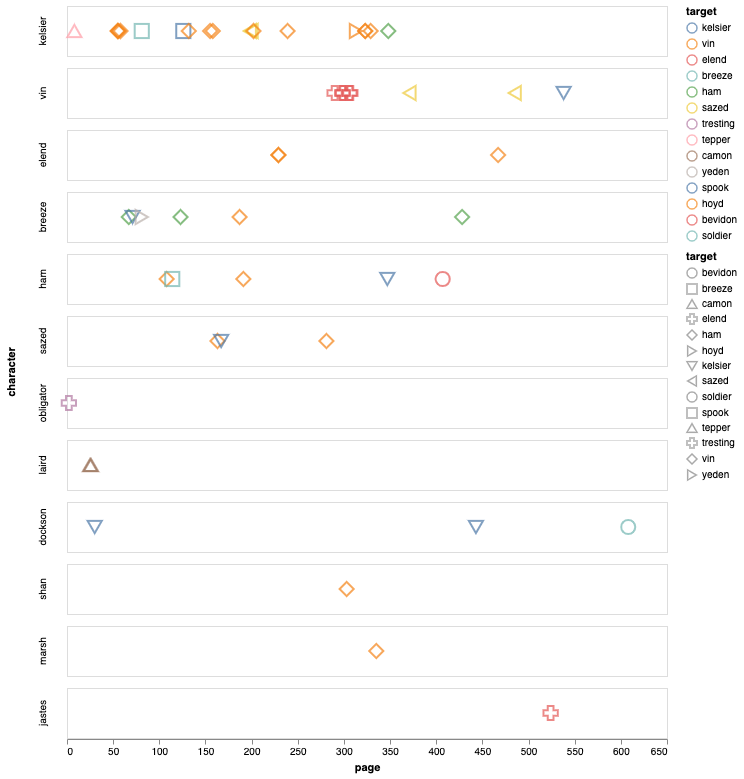

In [281]:
# Who does each character raise their eyebrows at?
alt.Chart(fe).mark_point(size=200,).encode(
    x='page:Q',
    color=alt.Color('target:N', sort=MAIN_CHARS),
    row = alt.Row('character:N', sort=MAIN_CHARS),
    tooltip=['character','target'],
    shape='target:N'
).properties(
    height=50, 
    width=600
)

/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


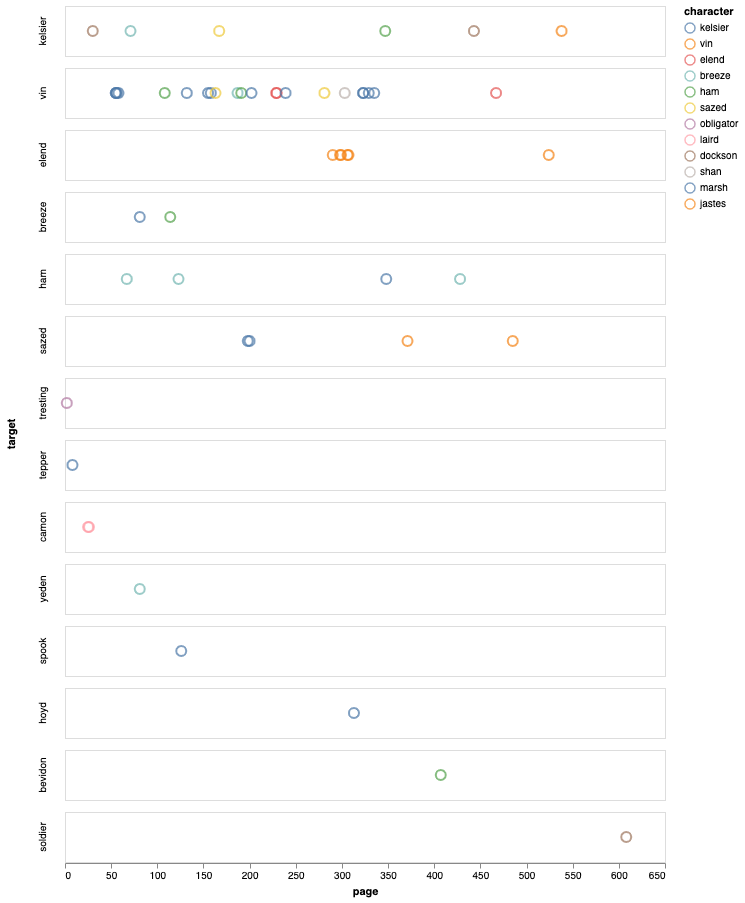

In [247]:
# Who get's eyebrows raised at them?
alt.Chart(fe).mark_point(size=100).encode(
    x='page:Q',
    color=alt.Color('character:N', sort=MAIN_CHARS),
    row = alt.Row('target:N', sort=MAIN_CHARS),
    tooltip=['character','target']
).properties(
    height=50, 
    width=600
)

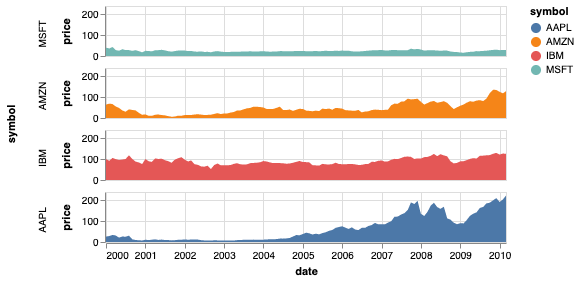

In [210]:
from vega_datasets import data

source = data.stocks()

alt.Chart(source).transform_filter(
    alt.datum.symbol != 'GOOG'
).mark_area().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N',
    row=alt.Row('symbol:N', sort=['MSFT', 'AMZN'])
).properties(height=50, width=400)

In [184]:
fe

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1
5,55,kelsier,vin,1
6,55,kelsier,vin,1
7,56,kelsier,vin,1
8,58,kelsier,vin,1
9,67,breeze,ham,1


## future
* directed graph
* chord diagram
* landscape plot